# EDA das ofertas relâmpagos

## Objetivo

* Como as *features* se relacionam com as *ofertas relâmpagos*.

In [1]:
#Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
##Eliminar os warnings
import warnings
warnings.filterwarnings("ignore")
##Ver todas as colunas do data frame
pd.set_option('display.max_columns', None)
##Ver todas as linhas do data frame
pd.set_option('display.max_rows', None)
##Dados sem notação científica
pd.set_option('display.float_format', '{:,.2f}'.format)

# 1- Visão preliminar dos dados

In [2]:
#Importar a base de dados
df =  pd.read_csv('ofertas_relampago.csv', sep = ',')
#Visualizar
df.head(3) #Visualizar cada linha como uma promoção

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.00,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.00,NaN,none,COMPUTERS,CE,MLM-SPEAKERS


**Nota**: Se **SOLD_AMOUNT** (receita total) e **SOLD_QUANTITY** (quantidade vendida) são missing, então o **DOMAIN_ID** (produto) não foi vendido durante o período da promoção.

In [3]:
#Volumetria
df.shape[0] #Total de ofertas: 48746 (cada linha pode ser vista como uma oferta)

48746

In [4]:
#Detalhamento das variáveis
df.info()   #Colunas (variáveis): 12

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OFFER_START_DATE           48746 non-null  object 
 1   OFFER_START_DTTM           48746 non-null  object 
 2   OFFER_FINISH_DTTM          48746 non-null  object 
 3   OFFER_TYPE                 48746 non-null  object 
 4   INVOLVED_STOCK             48746 non-null  int64  
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64  
 6   SOLD_AMOUNT                24579 non-null  float64
 7   SOLD_QUANTITY              24579 non-null  float64
 8   ORIGIN                     11316 non-null  object 
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object 
 10  DOM_DOMAIN_AGG1            48746 non-null  object 
 11  VERTICAL                   48746 non-null  object 
 12  DOMAIN_ID                  48746 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usag

## Entendendo as variáveis

### Variáveis do tipo data

* 3 variáveis do tipo de data: **OFFER_START_DATE** (dia do evento), **OFFER_START_DTTM** (hora que o evento começou) e **OFFER_FINISH_DTTM** (hora que o evento terminou).

In [5]:
#Variável - OFFER_START_DATE	
df['OFFER_START_DATE'].drop_duplicates().shape[0] #61 dias de oferta relâmpago

61

### Variáveis categóricas

**OFFER_TYPE**

In [6]:
#Variável - OFFER_TYPE 
df['OFFER_TYPE'].value_counts() #Todas as observações foram classificadas como lightning_deal (oferta relâmpago) 

OFFER_TYPE
lightning_deal    48746
Name: count, dtype: int64

**ORIGIN**

In [7]:
#Variável - ORIGIN
df['ORIGIN'].value_counts() #Classe "A" foi a única aparecer (Variável com alta incidência de missing values)

ORIGIN
A    11316
Name: count, dtype: int64

In [8]:
#Missing da variável ORIGIN
total_missing_origin = df['ORIGIN'].isna().sum()

#Percentual de valores missing da variável ORIGIN
percentual_missing_origin = (total_missing_origin / len(df)) * 100

print(f"Total de valores missing: {total_missing_origin}")
print(f"Percentual de valores missing: {percentual_missing_origin:.2f}%")

Total de valores missing: 37430
Percentual de valores missing: 76.79%


In [9]:
#Representatividade da Classe "A"
round(100 - 76.79,2) #23.21

23.21

**SHIPPING_PAYMENT_TYPE**

In [10]:
#Variável - SHIPPING_PAYMENT_TYPE
df['SHIPPING_PAYMENT_TYPE'].value_counts() #free_shipping (frete grátis) vs none (frete pago)

SHIPPING_PAYMENT_TYPE
free_shipping    26658
none             22088
Name: count, dtype: int64

In [11]:
#Variável - SHIPPING_PAYMENT_TYPE (Frequência relativa)
df['SHIPPING_PAYMENT_TYPE'].value_counts(True) #free_shipping (0.55) vs none (0.45)

SHIPPING_PAYMENT_TYPE
free_shipping   0.55
none            0.45
Name: proportion, dtype: float64

**DOM_DOMAIN_AGG1**

In [12]:
#Variável - DOM_DOMAIN_AGG1 --Tipo de produto comercializado (várias classes)
round(100 * df['DOM_DOMAIN_AGG1'].value_counts(True),1).head(8) 

DOM_DOMAIN_AGG1
HOME&DECOR           13.80
APPAREL ACCESORIES    9.00
APPAREL               7.90
COMPUTERS             7.70
SPORTS                6.70
PHARMACEUTICS         6.20
ELECTRONICS           6.20
PERSONAL CARE         6.20
Name: proportion, dtype: float64

In [13]:
#Total de classes
df['DOM_DOMAIN_AGG1'].value_counts().shape[0] #36 classes. Deste total, 8 concentram 64% dos casos.

36

* **Classes com mais representatividade (%)**
1. HOME&DECOR                      13.8
2. APPAREL ACCESORIES               9.0 (ACESSÓRIOS DE VESTUÁRIO)
3. APPAREL                          7.9
4. COMPUTERS                        7.7
5. SPORTS                           6.7
6. PHARMACEUTICS                    6.2
7. ELECTRONICS                      6.2
8. PERSONAL CARE                    6.2

In [14]:
#Estas 8 classes tem aproximadamente 64% do total de casos
round(13.8 + 9.0 + 7.9 + 7.7 + 6.7 + 6.2 + 6.2 + 6.2,0) #64

64.0

**VERTICAL**

In [15]:
#Variável - VERTICAL
round(100 * df['VERTICAL'].value_counts(True),1) 

VERTICAL
APP & SPORTS      27.20
HOME & INDUSTRY   22.60
CE                17.70
BEAUTY & HEALTH   14.70
CPG                5.60
T & B              5.40
ACC                5.30
ENTERTAINMENT      1.10
OTHERS             0.60
Name: proportion, dtype: float64

In [16]:
#Total de classes
df['VERTICAL'].value_counts().shape[0] #9

9

In [17]:
#As classes APP & SPORTS, HOME & INDUSTRY, CE e BEAUTY & HEALTH 
27.2 + 22.6 + 17.7 + 14.7 #4 classes concentram 82.2% dos dados.

82.2

**DOMAIN_ID**

In [18]:
#Variável - DOMAIN_ID
df['DOMAIN_ID'].value_counts().shape[0] #1266 (muitas classes)

1266

In [19]:
#Variável - DOMAIN_ID
df['DOMAIN_ID'].value_counts().head() #Principal: MLM-SURGICAL_AND_INDUSTRIAL_MASKS (4%) e MLM-HEADPHONES (2%)

DOMAIN_ID
MLM-SURGICAL_AND_INDUSTRIAL_MASKS    1759
MLM-HEADPHONES                        761
MLM-LED_STRIPS                        518
MLM-SUNGLASSES                        472
MLM-VEHICLE_LED_BULBS                 454
Name: count, dtype: int64

In [20]:
#Variável - DOMAIN_ID
df['DOMAIN_ID'].value_counts(True) #

DOMAIN_ID
MLM-SURGICAL_AND_INDUSTRIAL_MASKS                            0.04
MLM-HEADPHONES                                               0.02
MLM-LED_STRIPS                                               0.01
MLM-SUNGLASSES                                               0.01
MLM-VEHICLE_LED_BULBS                                        0.01
MLM-SNEAKERS                                                 0.01
MLM-WRISTWATCHES                                             0.01
MLM-TABLE_AND_DESK_LAMPS                                     0.01
MLM-MARKERS_AND_HIGHLIGHTERS                                 0.01
MLM-SMARTWATCHES                                             0.01
MLM-PANTS                                                    0.01
MLM-JACKETS_AND_COATS                                        0.01
MLM-CELLPHONE_COVERS                                         0.01
MLM-T_SHIRTS                                                 0.01
MLM-WALLETS                                                  0.01


# 2 - Data wrangling & Feature Engineering

In [21]:
#OFFER_START_DATE no formato de data
df['OFFER_START_DATE'] = pd.to_datetime(df.OFFER_START_DATE, format = '%Y-%m-%d')

In [22]:
#Criar a variável SAFRA: Mês da promoção
df['SAFRA'] = df['OFFER_START_DATE'].dt.to_period('M')
#Casting para string
df = df.astype({'SAFRA': 'string'})

In [23]:
#Converte as colunas para datetime
df['OFFER_START_DTTM'] = pd.to_datetime(df['OFFER_START_DTTM'])
df['OFFER_FINISH_DTTM'] = pd.to_datetime(df['OFFER_FINISH_DTTM'])

In [24]:
#Criar a variável DURACAO, duração da promoção (medido em horas)
df['DURACAO'] = ((df['OFFER_FINISH_DTTM'] - df['OFFER_START_DTTM']).dt.total_seconds() / 3600).round(2)

In [25]:
#Criar a variável, PERIODO_DIA.

#Extrair a hora do datetime
df['HORA'] = pd.to_datetime(df['OFFER_START_DTTM']).dt.hour

#Definir os intervalos e rótulos
bins = [0, 6, 12, 18, 24]  # 0-6, 6-12, 12-18, 18-24
labels = ['MADRUGADA', 'MANHA', 'TARDE', 'NOITE']

#Criar a coluna PERIODO_DIA
df['PERIODO_DIA'] = pd.cut(df['HORA'], bins=bins, labels=labels, right=False, include_lowest=True)

#Remover a coluna auxiliar 'HORA' se não for mais necessária
df.drop('HORA', axis=1, inplace=True)

In [26]:
#Criar a variável DIA_SEMANA

dias_semana_traducao = {
    'Monday': 'SEGUNDA',
    'Tuesday': 'TERCA',
    'Wednesday': 'QUARTA',
    'Thursday': 'QUINTA',
    'Friday': 'SEXTA',
    'Saturday': 'SABADO',
    'Sunday': 'DOMINGO'
}

df['DIA_SEMANA'] = df['OFFER_START_DTTM'].dt.day_name().map(dias_semana_traducao)

In [27]:
#FLAG_N_VENDEU: 1 se SOLD_AMOUNT é nulo, 0 caso contrário
df['FLAG_N_VENDEU'] = np.where(df['SOLD_AMOUNT'].isna(), 1, 0).astype(int)

In [28]:
#ALVO - Criar a variável VENDA_POR_HORA com duas casas decimais - quanto maior o valor da variável, maior a saída do produto
df['VENDA_POR_HORA'] = (df['SOLD_AMOUNT'] / df['DURACAO']).round(2).fillna(0)

In [29]:
#FLAG_ESTOQUE_NEGATIVO: 1 se o estoque final for negativo, 0 caso contrário
df['FLAG_ESTOQUE_NEGATIVO'] = (df['REMAINING_STOCK_AFTER_END'] < 0).astype(int)

In [30]:
#Criar a variável PRECO_UNITARIO_PRODUTO - quanto maior o valor da variável, maior o preço produto
df['PRECO_UNITARIO_PRODUTO'] = (df['SOLD_AMOUNT'] / df['SOLD_QUANTITY']).fillna(0)

In [31]:
#Visualização
df.head(3) #8 variáveis foram criadas 

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,SAFRA,DURACAO,PERIODO_DIA,DIA_SEMANA,FLAG_N_VENDEU,VENDA_POR_HORA,FLAG_ESTOQUE_NEGATIVO,PRECO_UNITARIO_PRODUTO
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.00,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS,2021-06,7.05,TARDE,TERCA,0,0.67,1,0.79
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS,2021-06,6.00,TARDE,TERCA,1,0.00,0,0.00
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.00,NaN,none,COMPUTERS,CE,MLM-SPEAKERS,2021-06,6.00,MANHÃ,TERCA,0,1.79,0,3.58


In [32]:
#Data frame com as novas variáveis 
##Gera um CSV 

df.to_csv('df_completo.csv', header=True, index=False, sep=';')

# 3 - EDA

* **ALVO**: VENDA_POR_HORA (*total de itens vendidos por hora*)
* **Volumetria** (total de ofertas): 48.746

In [37]:
#Metade das ofertas relâmpagos não teve efeito - não vendeu
100 * df['FLAG_N_VENDEU'].value_counts(True) 

FLAG_N_VENDEU
0   50.42
1   49.58
Name: proportion, dtype: float64

In [62]:
100 * df['FLAG_ESTOQUE_NEGATIVO'].value_counts(True) #2.6% das ofertas venderam mais que o esperado

FLAG_ESTOQUE_NEGATIVO
0   97.39
1    2.61
Name: proportion, dtype: float64

In [51]:
df['VENDA_POR_HORA'].describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]) #Média: 5 itens vendidos por hora

count   48,746.00
mean         4.68
std         22.94
min          0.00
10%          0.00
20%          0.00
30%          0.00
40%          0.00
50%          0.16
60%          0.80
70%          1.56
80%          3.12
90%          7.86
max      1,290.29
Name: VENDA_POR_HORA, dtype: float64

## 1. SAFRA

In [42]:
#Meses
round(100 * df['SAFRA'].value_counts(True).sort_values(),1) 
#2021-06: 37.60% (18336)
#2021-07: 62.40% (30410)

SAFRA
2021-06   37.60
2021-07   62.40
Name: proportion, dtype: Float64

In [44]:
df['SAFRA'].value_counts().sort_values()

SAFRA
2021-06    18336
2021-07    30410
Name: count, dtype: Int64

### Relação do entre SAFRA com FLAG_N_VENDEU 

In [47]:
100 * df.groupby('SAFRA')['FLAG_N_VENDEU'].value_counts(normalize=True).unstack() 
#Taxas praticamente constantes entre os meses (não foi visto um efeito sazonal entre os meses)

FLAG_N_VENDEU,0,1
SAFRA,,
2021-06,48.70,51.30
2021-07,51.46,48.54


### Relação do SAFRA com VENDA_POR_HORA 

In [50]:
df.groupby('SAFRA')['VENDA_POR_HORA'].mean()

SAFRA
2021-06   4.19
2021-07   4.98
Name: VENDA_POR_HORA, dtype: float64

## 2. PERIODO_DIA

In [54]:
round(100 * df['PERIODO_DIA'].value_counts(True).sort_values(),1) #As ofertas foram concentradas no período da tarde - 12 e 18

PERIODO_DIA
MADRUGADA    0.20
NOITE       27.50
MANHÃ       29.50
TARDE       42.90
Name: proportion, dtype: float64

In [58]:
df['PERIODO_DIA'].value_counts().sort_values() 

PERIODO_DIA
MADRUGADA       74
NOITE        13386
MANHÃ        14376
TARDE        20910
Name: count, dtype: int64

### Relação do entre PERIODO_DIA com FLAG_N_VENDEU

In [56]:
100 * df.groupby('PERIODO_DIA')['FLAG_N_VENDEU'].value_counts(normalize=True).sort_values().unstack() 
#Período da madruga é o PIOR - menos ofertas e maior frequência de ofertas não ativas
#NOITE (18-24): Maior taxa de ofertas ativadas - 28% das ofertas (Possibilidade para se explorar)
#Perfomance da NOITE é melhor que o da MANHA

FLAG_N_VENDEU,0,1
PERIODO_DIA,,
MADRUGADA,39.19,60.81
MANHÃ,44.13,55.87
TARDE,51.50,48.50
NOITE,55.56,44.44


### Relação do entre PERIODO_DIA com VENDA_POR_HORA 

In [57]:
df.groupby('PERIODO_DIA')['VENDA_POR_HORA'].mean() #A tarde vende-se mais itens por hora (6)
                                                   #Performance da NOITE é melhor que a de MANHA
                                                   #Desprezar o resultado da MADRUGADA

PERIODO_DIA
MADRUGADA   13.39
MANHÃ        3.01
TARDE        6.26
NOITE        3.97
Name: VENDA_POR_HORA, dtype: float64

## 3. DOM_DOMAIN_AGG1

### Relação do entre DOM_DOMAIN_AGG1 com FLAG_N_VENDEU 

In [64]:
100 * df.groupby('DOM_DOMAIN_AGG1')['FLAG_N_VENDEU'].value_counts(normalize=True).sort_values().unstack() 
#Percentual de não vendeu
##HOME&DECOR (50%) , APPAREL ACCESORIES (52%), APPARE (49%), COMPUTERS (43%), SPORTS (48%), PHARMACEUTICS (27%), ELECTRONICS (55%) e PERSONAL CARE (49%)

FLAG_N_VENDEU,0,1
DOM_DOMAIN_AGG1,,
ACC TOOLS,58.95,41.05
AGRO,NaN,100.00
ANTIQUES & HOBBIES,60.00,40.00
APPAREL,51.48,48.52
APPAREL ACCESORIES,48.03,51.97
AUTOPARTS,53.18,46.82
BABY,21.72,78.28
BATTERIES,48.57,51.43
BEAUTY EQUIPMENT,62.88,37.12


### Relação do entre DOM_DOMAIN_AGG1 com VENDA_POR_HORA 

In [65]:
df.groupby('DOM_DOMAIN_AGG1')['VENDA_POR_HORA'].mean()
#Itens vendidos por hora - média
##HOME&DECOR (2.64) , APPAREL ACCESORIES (1.55), APPARE (1.67), COMPUTERS (4.43), SPORTS (2.13), PHARMACEUTICS (24.78), ELECTRONICS (6.39) e PERSONAL CARE (1.27)

DOM_DOMAIN_AGG1
ACC TOOLS                       2.06
AGRO                            0.00
ANTIQUES & HOBBIES              3.79
APPAREL                         1.67
APPAREL ACCESORIES              1.55
AUTOPARTS                       2.09
BABY                            0.81
BATTERIES                       0.59
BEAUTY EQUIPMENT               14.54
BOOKS, MULTIMEDIA & OTHER E!    0.60
CLEANING                        1.86
COMPUTERS                       4.43
DRINKS                          1.30
ELECTRONICS                     6.39
FOODS                           0.69
FOOTWEAR                        2.67
HOME&DECOR                      2.64
INDUSTRY                        3.91
MOBILE                         15.85
MOTOPARTS                       1.73
MUSICAL INSTRUMENTS             1.91
OTHER                           2.18
PARTY                           0.94
PERSONAL CARE                   1.27
PERSONAL HYGIENE                1.14
PET PRODUCTS                    1.13
PETS FOOD             

### Relação do entre DOM_DOMAIN_AGG1 com PRECO_UNITARIO_PRODUTO

In [66]:
df.groupby('DOM_DOMAIN_AGG1')['PRECO_UNITARIO_PRODUTO'].mean()

DOM_DOMAIN_AGG1
ACC TOOLS                       4.42
AGRO                            0.00
ANTIQUES & HOBBIES              9.41
APPAREL                         2.75
APPAREL ACCESORIES              2.62
AUTOPARTS                       2.71
BABY                            3.05
BATTERIES                       1.00
BEAUTY EQUIPMENT                5.06
BOOKS, MULTIMEDIA & OTHER E!    1.90
CLEANING                        2.44
COMPUTERS                       7.38
DRINKS                          2.01
ELECTRONICS                    11.73
FOODS                           1.14
FOOTWEAR                        5.14
HOME&DECOR                      3.19
INDUSTRY                        4.89
MOBILE                         13.61
MOTOPARTS                       3.98
MUSICAL INSTRUMENTS             3.46
OTHER                           2.23
PARTY                           1.80
PERSONAL CARE                   1.93
PERSONAL HYGIENE                1.89
PET PRODUCTS                    2.98
PETS FOOD             

## 4. SHIPPING_PAYMENT_TYPE

### Relação do entre SHIPPING_PAYMENT_TYPE com VENDA_POR_HORA 

In [67]:
100 * df.groupby('SHIPPING_PAYMENT_TYPE')['FLAG_N_VENDEU'].value_counts(normalize=True).sort_values().unstack() 

FLAG_N_VENDEU,0,1
SHIPPING_PAYMENT_TYPE,,
free_shipping,44.02,55.98
none,58.15,41.85


### Relação do entre SHIPPING_PAYMENT_TYPE com VENDA_POR_HORA 

In [69]:
df.groupby('SHIPPING_PAYMENT_TYPE')['VENDA_POR_HORA'].mean()

SHIPPING_PAYMENT_TYPE
free_shipping   5.01
none            4.28
Name: VENDA_POR_HORA, dtype: float64

## 5. VERTICAL

In [70]:
100 * df.groupby('VERTICAL')['FLAG_N_VENDEU'].value_counts(normalize=True).sort_values().unstack() 

FLAG_N_VENDEU,0,1
VERTICAL,,
ACC,50.87,49.13
APP & SPORTS,50.22,49.78
BEAUTY & HEALTH,61.93,38.07
CE,52.49,47.51
CPG,44.47,55.53
ENTERTAINMENT,33.90,66.10
HOME & INDUSTRY,48.85,51.15
OTHERS,42.65,57.35
T & B,29.76,70.24


In [71]:
df.groupby('VERTICAL')['VENDA_POR_HORA'].mean()

VERTICAL
ACC                2.27
APP & SPORTS       1.89
BEAUTY & HEALTH   13.29
CE                 7.55
CPG                1.33
ENTERTAINMENT      0.67
HOME & INDUSTRY    2.75
OTHERS             1.24
T & B              0.99
Name: VENDA_POR_HORA, dtype: float64

In [72]:
df.groupby('VERTICAL')['PRECO_UNITARIO_PRODUTO'].mean()

VERTICAL
ACC                3.38
APP & SPORTS       3.06
BEAUTY & HEALTH    3.74
CE                10.23
CPG                1.83
ENTERTAINMENT      1.98
HOME & INDUSTRY    3.55
OTHERS             3.05
T & B              2.68
Name: PRECO_UNITARIO_PRODUTO, dtype: float64

## 6. DIA_SEMANA

In [75]:
df['DIA_SEMANA'].value_counts(True).sort_index()

DIA_SEMANA
DOMINGO   0.12
QUARTA    0.14
QUINTA    0.15
SABADO    0.15
SEGUNDA   0.13
SEXTA     0.16
TERCA     0.15
Name: proportion, dtype: float64

In [73]:
100 * df.groupby('DIA_SEMANA')['FLAG_N_VENDEU'].value_counts(normalize=True).sort_values().unstack() 

FLAG_N_VENDEU,0,1
DIA_SEMANA,,
DOMINGO,48.87,51.13
QUARTA,53.59,46.41
QUINTA,51.95,48.05
SABADO,46.56,53.44
SEGUNDA,52.53,47.47
SEXTA,49.20,50.80
TERCA,50.68,49.32


## 7. ORIGIN

In [76]:
100 * df.groupby('ORIGIN')['FLAG_N_VENDEU'].value_counts(normalize=True).sort_values().unstack() 

FLAG_N_VENDEU,0,1
ORIGIN,,
A,46.02,53.98


In [78]:
df.head(3)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,SAFRA,DURACAO,PERIODO_DIA,DIA_SEMANA,FLAG_N_VENDEU,VENDA_POR_HORA,FLAG_ESTOQUE_NEGATIVO,PRECO_UNITARIO_PRODUTO
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.00,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS,2021-06,7.05,TARDE,TERCA,0,0.67,1,0.79
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS,2021-06,6.00,TARDE,TERCA,1,0.00,0,0.00
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.00,NaN,none,COMPUTERS,CE,MLM-SPEAKERS,2021-06,6.00,MANHÃ,TERCA,0,1.79,0,3.58


In [79]:
# Filtrar os casos onde ORIGIN é nulo e calcular a frequência relativa de FLAG_N_VENDEU
freq_relativa_null = (
    df[df['ORIGIN'].isna()]['FLAG_N_VENDEU']  # Filtra ORIGIN nulo e seleciona a coluna FLAG_N_VENDEU
    .value_counts(normalize=True)              # Calcula as proporções (frequência relativa)
    .mul(100)                                 # Converte para porcentagem (ex: 0.25 -> 25%)
    .round(2)                                 # Arredonda para 2 casas decimais
)

print(freq_relativa_null)

FLAG_N_VENDEU
0   51.75
1   48.25
Name: proportion, dtype: float64


## Ofertas que efetivaram vendas

In [52]:
oferta_ativada = df.loc[df.FLAG_N_VENDEU == 0]
#Visualização
oferta_ativada.head(6)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,SAFRA,DURACAO,PERIODO_DIA,DIA_SEMANA,FLAG_N_VENDEU,VENDA_POR_HORA,FLAG_ESTOQUE_NEGATIVO,PRECO_UNITARIO_PRODUTO
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.00,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS,2021-06,7.05,TARDE,TERCA,0,0.67,1,0.79
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.00,NaN,none,COMPUTERS,CE,MLM-SPEAKERS,2021-06,6.00,MANHÃ,TERCA,0,1.79,0,3.58
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.00,NaN,none,COMPUTERS,CE,MLM-HEADPHONES,2021-06,6.60,NOITE,TERCA,0,1.07,0,3.52
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.00,NaN,none,COMPUTERS,CE,MLM-HEADPHONES,2021-06,2.80,TARDE,TERCA,0,14.16,0,2.64
7,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:39+00:00,lightning_deal,10,-1,103.03,11.00,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES,2021-06,4.09,NOITE,TERCA,0,25.19,1,9.37
9,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:00+00:00,lightning_deal,15,13,10.65,2.00,NaN,free_shipping,ELECTRONICS,CE,MLM-SMART_SPEAKERS,2021-06,6.00,TARDE,TERCA,0,1.78,0,5.33


In [53]:
oferta_ativada.shape[0]

24579

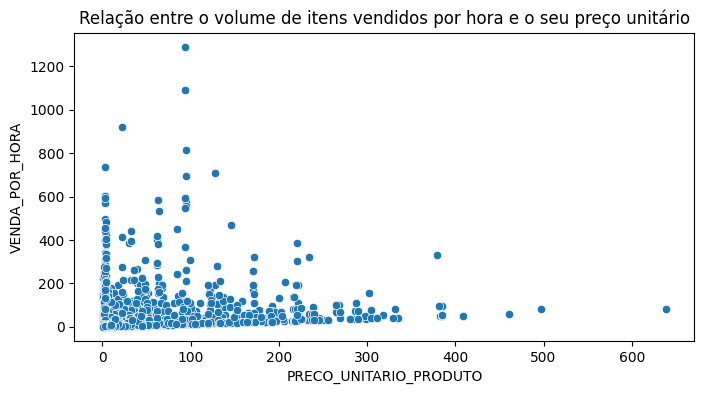

In [59]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=oferta_ativada, x='PRECO_UNITARIO_PRODUTO', y='VENDA_POR_HORA')
plt.title('Relação entre o volume de itens vendidos por hora e o seu preço unitário')
plt.show()

In [63]:
oferta_ativada[['PRECO_UNITARIO_PRODUTO', 'VENDA_POR_HORA']].corr(method='spearman') #0.46

,PRECO_UNITARIO_PRODUTO,VENDA_POR_HORA
PRECO_UNITARIO_PRODUTO,1.00,0.46
VENDA_POR_HORA,0.46,1.00


## Não vendeu

In [ ]:
#Volume de promoções por dia da semana
round(100 * df['DIA_SEMANA'].value_counts(True),1) 

In [ ]:
vendas_por_dia = df.groupby('DIA_SEMANA', as_index=False).agg({
    'SOLD_QUANTITY': 'mean',
    'RECEITA_PROMOCAO': 'mean'
}).round(2)

# Renomeando as colunas
vendas_por_dia.rename(columns={
    'SOLD_QUANTITY': 'QUANTIDADE_MEDIA_VENDIDA_DIA',
    'RECEITA_PROMOCAO': 'RECEITA_MEDIA_VENDIDA_DIA'
}, inplace=True)

vendas_por_dia

In [ ]:
#Meses disponíveis
df['SAFRA'].drop_duplicates() #Meses de junho e julho de 2021

In [ ]:
#Volumetria de promoções por mês 
df['SAFRA'].value_counts().sort_index()

In [ ]:
#Quantidade vendida e receita nos meses (absoluto)
vendas_por_mes = df.groupby('SAFRA', as_index=False).agg({
    'SOLD_QUANTITY': 'sum',
    'RECEITA_PROMOCAO': 'sum'
})

vendas_por_mes

**Produtos que não venderam na promoção**

In [ ]:
#Não vendeu por safra
nao_vendeu_por_safra = df.groupby('SAFRA', as_index=False)['FLAG_N_VENDEU'].sum()
nao_vendeu_por_safra

In [ ]:
n_vendeu = df.loc[df.FLAG_N_VENDEU ==1]
#Visualização
n_vendeu.head(2)

In [ ]:
n_vendeu.info()

In [ ]:
#Variável - VERTICAL
round(100 * n_vendeu['VERTICAL'].value_counts(True),1) 

In [ ]:
#Variável - VERTICAL
round(100 * n_vendeu['DIA_SEMANA'].value_counts(True),1) 